In [200]:
import pandas as pd
import sqlite3

In [201]:
connect = sqlite3.connect('../../datasets/checking-logs.sqlite')

In [202]:
query = """
SELECT datetime AS date FROM pageviews WHERE uid LIKE 'user_%'
"""

In [203]:
commits_query = """
SELECT timestamp as date FROM checker
WHERE uid LIKE 'user_%'
"""

In [204]:
pageviews = pd.read_sql(query,connect,parse_dates=['date'])
commits = pd.read_sql(commits_query,connect,parse_dates=['date'])

In [205]:
daily_views = pageviews['date'].dt.date.value_counts().rename('views')
daily_commits = commits['date'].dt.date.value_counts().rename('commit')

In [206]:
merged = pd.concat([daily_views, daily_commits], axis = 1).dropna()

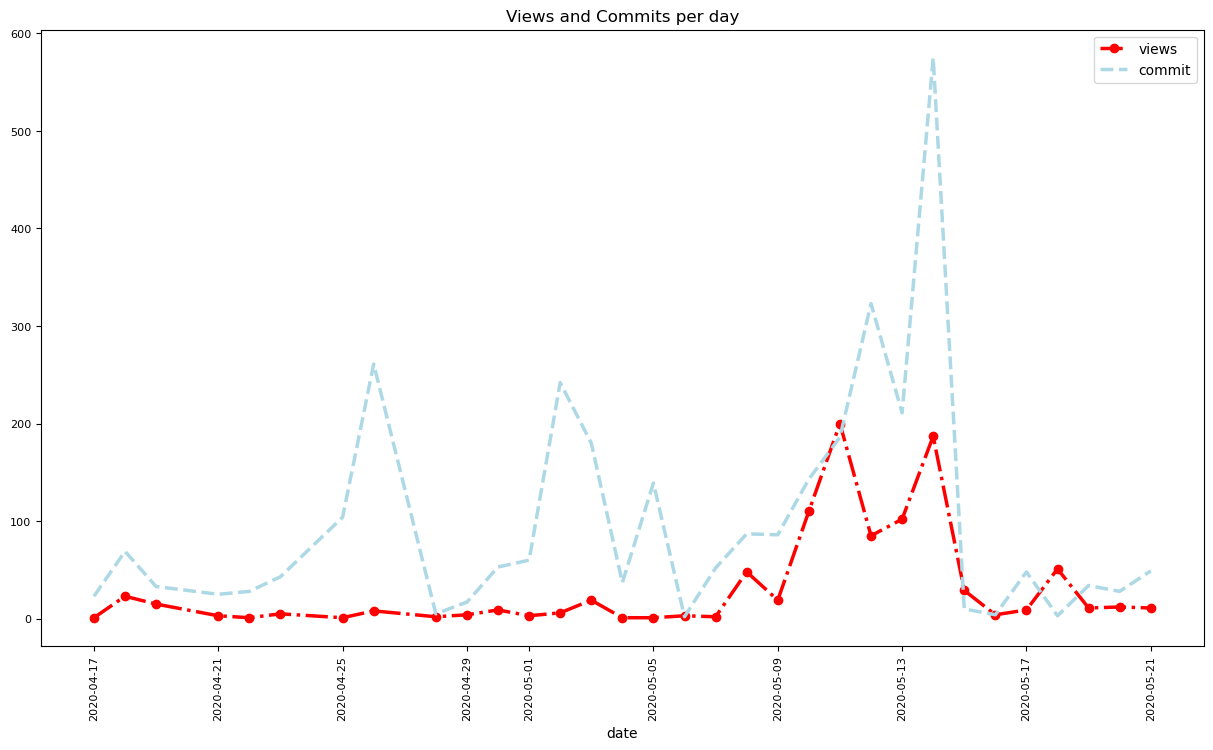

In [207]:
ax = merged.plot(
    kind='line',
    figsize=(15, 8),
    fontsize=8,
    rot=90,
    title='Views and Commits per day',
    color=['red', 'lightblue'],
    style=['o-.', '--'],
    linewidth=2.5
)

In [208]:
count = len(merged[merged['views'] > 150])

In [209]:
connect.close()

In [210]:
print(f"The answer is {count}.")

The answer is 2.
